# import

In [1]:
 # ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


import env
import os
import acquire
import prepare

# acquire

In [2]:
titanic = acquire.get_titanic_data(acquire.get_connection)

In [3]:
titanic = prepare.prep_titanic(titanic)

In [4]:
titanic = titanic.dropna()

# split

In [5]:
train,validate,test = prepare.split_data(titanic,'survived')

# x and y data

In [6]:
x_train = train.drop(columns=['survived','sex','embark_town'])
y_train = train.survived

x_validate = validate.drop(columns=['survived','sex','embark_town'])
y_validate = validate.survived

x_test = test.drop(columns=['survived','sex','embark_town'])
y_test = test.survived

In [7]:
x_train.shape,x_validate.shape,x_test.shape

((399, 9), (172, 9), (143, 9))

# Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [8]:
def est_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_pred = y_train.mode()
    
    # create a series of predictions with that value(length of training set)
    y_train_pred = pd.Series([0]*len(y_train))
    
    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [9]:
baseline_accuracy = est_baseline(y_train)

In [10]:
baseline_accuracy

0.5939849624060151

In [11]:
# log reg object
logit1 = LogisticRegression(C=1, 
                            random_state=123,
                            intercept_scaling=1,
                            solver='liblinear')


In [12]:
# fit model
logit1.fit(x_train[['age','pclass','fare']],
          y_train)

LogisticRegression(C=1, random_state=123, solver='liblinear')

In [13]:
# compute accuracy
train_accuracy = logit1.score(x_train[['age', 'pclass', 'fare']], 
                             y_train)

In [14]:
train_accuracy

0.7117794486215538

In [15]:
# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')


Train Accuracy: 0.7117794486215538
Baseline Accuracy: 0.5939849624060151


# Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [16]:
# log reg object
logit2 = LogisticRegression(C=1, 
                            random_state=123,
                            intercept_scaling=1,
                            solver='liblinear')


In [17]:
# fit model with age, pclass, fare and sex_male as only features
logit2.fit(x_train[['age', 'pclass', 'fare', 'sex_male']], 
          y_train)

LogisticRegression(C=1, random_state=123, solver='liblinear')

In [18]:
# compute accuracy
train_accuracy = logit2.score(x_train[['age', 'pclass', 'fare', 'sex_male']], 
                             y_train)

In [19]:
# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.7969924812030075
Baseline Accuracy: 0.5939849624060151


# Try out other combinations of features and models.

## model 3

In [20]:
# create algorithm object
logit3 = LogisticRegression(C=1, 
                           random_state=123, 
                           intercept_scaling=1, 
                           solver= 'liblinear'
                                              )

In [21]:
# fit model with all features
logit3.fit(x_train, y_train)

LogisticRegression(C=1, random_state=123, solver='liblinear')

In [22]:
# compute accuracy
train_acc3 = logit3.score(x_train, y_train)

In [23]:
# compare this model with baseline
print(f'Train Accuracy: {train_acc3}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8045112781954887
Baseline Accuracy: 0.5939849624060151


## model 4

In [24]:
# create algorithm object
logit4 = LogisticRegression(C=1, 
                           random_state=123, 
                           intercept_scaling=1, 
                           solver='lbfgs'
                          )

In [25]:
# fit model with all features
logit4.fit(x_train, y_train)

LogisticRegression(C=1, random_state=123)

In [26]:
# compute accuracy
train_acc4 = logit4.score(x_train, y_train)

In [27]:
# compare this model with baseline
print(f'Train Accuracy: {train_acc4}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8145363408521303
Baseline Accuracy: 0.5939849624060151


## model 5

In [28]:
logit5 = LogisticRegression(C=1,
                            class_weight='balanced',
                            random_state=123, 
                            intercept_scaling=1, 
                            solver='lbfgs'
                           )

In [29]:
# fit model with all features
logit5.fit(x_train, y_train)

LogisticRegression(C=1, class_weight='balanced', random_state=123)

In [30]:
# compute accuracy
train_acc5 = logit5.score(x_train, y_train)

In [31]:
# compare this model with baseline
print(f'Train Accuracy: {train_acc5}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8070175438596491
Baseline Accuracy: 0.5939849624060151


## model 6

In [32]:
# create algorithm object
logit6 = LogisticRegression(C=0.1,
                            random_state=123, 
                            intercept_scaling=1, 
                            solver='lbfgs'
                           )

In [33]:
# fit model with all features
logit6.fit(x_train, y_train)

LogisticRegression(C=0.1, random_state=123)

In [34]:
# compute accuracy
train_acc6 = logit6.score(x_train, y_train)

In [35]:
# compare this model with baseline
print(f'Train Accuracy: {train_acc6}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8145363408521303
Baseline Accuracy: 0.5939849624060151


# Use you best 3 models to predict and evaluate on your validate sample.

In [36]:
# model 3 = .807# use logit4 to make predictions for the X_validate observations
y_val_pred4 = logit4.predict(x_validate)

# compute accuracy
val_acc4 = logit4.score(x_validate, y_validate)

# create a list of model_number, training accuracy, validate accuracy

# to add to a dataframe at the end comparing all the models. 
model4 = [4, train_acc4, val_acc4]

# use logit5 to make predictions for the X_validate observations
y_val_pred5 = logit5.predict(x_validate)

# compute accuracy
val_acc5 = logit5.score(x_validate, y_validate)

# create a list of model_number, training accuracy, validate accuracy

# to add to a dataframe at the end comparing all the models. 
model5 = [5, train_acc5, val_acc5]

# use logit6 to make predictions for the X_validate observations
y_val_pred6 = logit6.predict(x_validate)

# compute accuracy
val_acc6 = logit6.score(x_validate, y_validate)

# create a list of model_number, training accuracy, validate accuracy

# to add to a dataframe at the end comparing all the models. 
model6 = [6, train_acc6, val_acc6]

pd.DataFrame([model4, model5, model6], columns=['model', 
                                                'in-sample accuracy',
                                                'out-of-sample accuracy'
                                               ])
# model 4 = .824
# model 5 = .812
# model 6 = .827

,model,in-sample accuracy,out-of-sample accuracy
0,4,0.814536,0.819767
1,5,0.807018,0.831395
2,6,0.814536,0.831395


In [37]:
# model 6 performs the best in and out of sample

# Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [39]:
y_test_pred = logit6.predict(x_test)

In [41]:
test_acc = logit6.score(x_test,y_test)

In [42]:
test_acc

0.7622377622377622

In [43]:
log_coeffs = pd.DataFrame(logit6.coef_[0], index = x_test.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)


In [46]:
odds = np.exp(log_coeffs)
odds

,coeffs
sex_male,0.231529
pclass,0.488580
alone,0.620583
sibsp,0.705055
embark_town_Southampton,0.813727
parch,0.931367
age,0.961602
embark_town_Queenstown,0.979220
fare,1.005638


In [ ]:
# Create an array of probabilities of surviving

y_pred_proba = logit6.predict_proba(x_test)

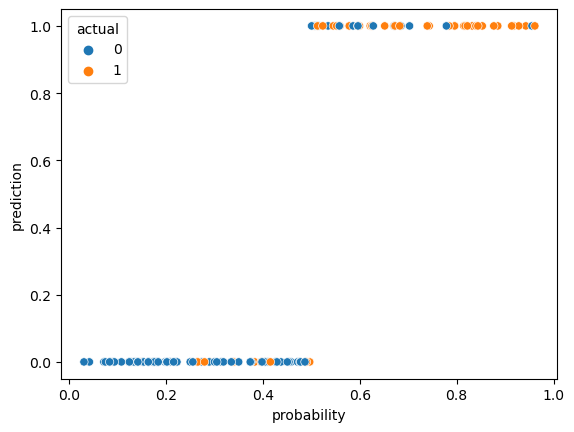

In [61]:
# select the 2nd item in the array to get prob of survival (1)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

test_results = pd.DataFrame({'probability': y_pred_proba, 
                             'prediction': y_test_pred,
                             'actual': y_test})

sns.scatterplot(x='probability', y='prediction', 
                data=test_results, 
                hue='actual'
               )
plt.show()